In [1]:
# PowerCo Churn – Exploratory Data Analysis

#In this notebook, I’m exploring the client and pricing data from PowerCo to understand what patterns might relate to customer churn.

#There are two main datasets:
# client_data.csv : Customer profile, usage, forecast, margins, and churn status
# price_data.csv : Variable and fixed pricing across three time blocks

#AIM: Get a sense of the data, check for missing values, and visualize basic patterns — especially around churn.


In [6]:
#2. Imports and Data Load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")

# Load the datasets
client_df = pd.read_csv("client_data.csv")
price_df = pd.read_csv("price_data.csv")


In [7]:
#just a test of first some cells
# Viewing the first few rows of 
client_df.head()
price_df.head()


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [8]:
# Checkin info and nulls
client_df.info()
price_df.info()

print("Missing values in client data:\n", client_df.isnull().sum())
print("\nMissing values in price data:\n", price_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [9]:
# Summary stats for numerical columns
client_df.describe().T
price_df.describe().T


,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


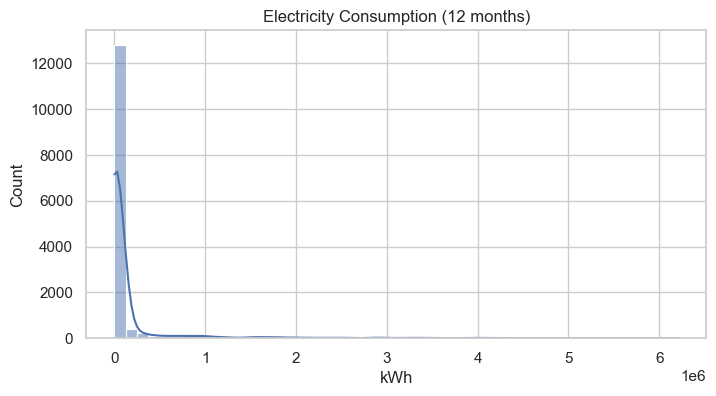

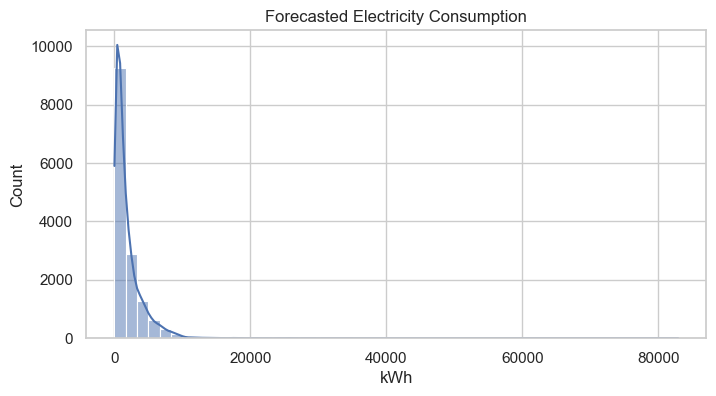

In [11]:
#visualisations -

# Distribution of electricity usage over last 12 months
plt.figure(figsize=(8, 4))
sns.histplot(client_df["cons_12m"], kde=True, bins=50)
plt.title("Electricity Consumption (12 months)")
plt.xlabel("kWh")
plt.show()

# Distribution of forecasted consumption
plt.figure(figsize=(8, 4))
sns.histplot(client_df["forecast_cons_12m"], kde=True, bins=50)
plt.title("Forecasted Electricity Consumption")
plt.xlabel("kWh")
plt.show()


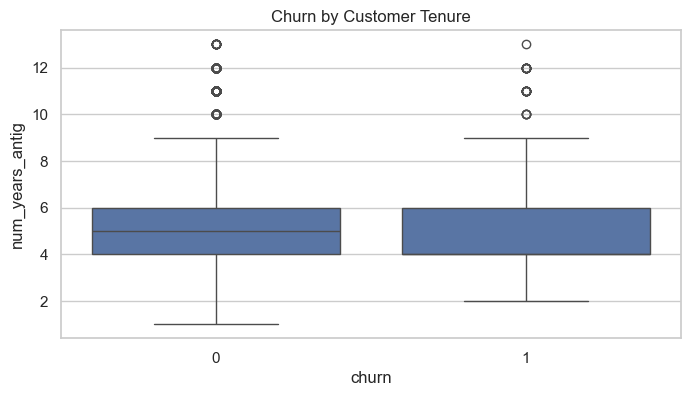

In [12]:
#Churn Breakdown by Contract Duration : 

# Churn count by customer antiquity (num_years_antig)
plt.figure(figsize=(8, 4))
sns.boxplot(x="churn", y="num_years_antig", data=client_df)
plt.title("Churn by Customer Tenure")
plt.show()


In [15]:
## Initial Observations

#🔹 **Electricity Consumption:**  
#Most customers consume between 1,000–20,000 kWh annually, but some use much more (possible outliers). The distribution is right-skewed.

#🔹 **Forecasted Usage:**  
#The forecasted values are fairly close to the historical usage, which could suggest reliable models—or flat usage trends.

#🔹 **Tenure and Churn:**  
#There’s a noticeable trend where newer customers (lower `num_years_antig`) show higher churn risk. Loyalty seems to build over time.

#🔹 **Data Quality:**  
#Both datasets are fairly clean. A few columns have missing values, but none appear critical at this stage.

#These early insights will help shape the hypothesis and modeling stages ahead—especially around pricing, tenure
